In [1]:
import pandas as pd

In [15]:
data = pd.read_csv("data.csv")

In [16]:
data.head()

,id,unique_id,government_id,diagnosed_date,age,gender,detected_city,detected_city_pt,detected_district,detected_state,nationality,current_status,status_change_date,notes,current_location,current_location_pt,contacts
0,1,1,KL-TS-P1,2020-01-30,20.0,Female,Thrissur,SRID=4326;POINT (76.21325419999999 10.5256264),Thrissur,Kerala,India,Recovered,2020-02-14,Travelled from Wuhan.\nStudent from Wuhan,NaN,SRID=4326;POINT (76.21325419999999 10.5256264),[]
1,2,2,KL-AL-P1,2020-02-02,NaN,Unknown,Alappuzha,SRID=4326;POINT (76.333482 9.498000100000001),Alappuzha,Kerala,India,Recovered,2020-02-14,Travelled from Wuhan.\nStudent from Wuhan,NaN,SRID=4326;POINT (76.333482 9.498000100000001),[]
2,3,3,KL-KS-P1,2020-02-03,NaN,Unknown,Kasaragod,SRID=4326;POINT (80 20),Kasaragod,Kerala,India,Recovered,2020-02-14,Travelled from Wuhan.\nStudent from Wuhan,NaN,SRID=4326;POINT (80 20),[]
3,4,4,DL-P1,2020-03-02,45.0,Male,East Delhi (Mayur Vihar),SRID=4326;POINT (80 20),East Delhi,Delhi,India,Recovered,2020-03-15,"Travelled from Austria, Italy.\nTravel history...",NaN,SRID=4326;POINT (80 20),"[22,23,24,25,26,27,47]"
4,5,5,TS-P1,2020-03-02,24.0,Male,Hyderabad,SRID=4326;POINT (78.4349398685041 17.4263524),Hyderabad,Telangana,India,Recovered,2020-03-02,".\nTravel history to Dubai, Singapore contact",NaN,SRID=4326;POINT (78.4349398685041 17.4263524),[]


In [17]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

C:\Users\MY DESKTOP\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1152x432 with 0 Axes>

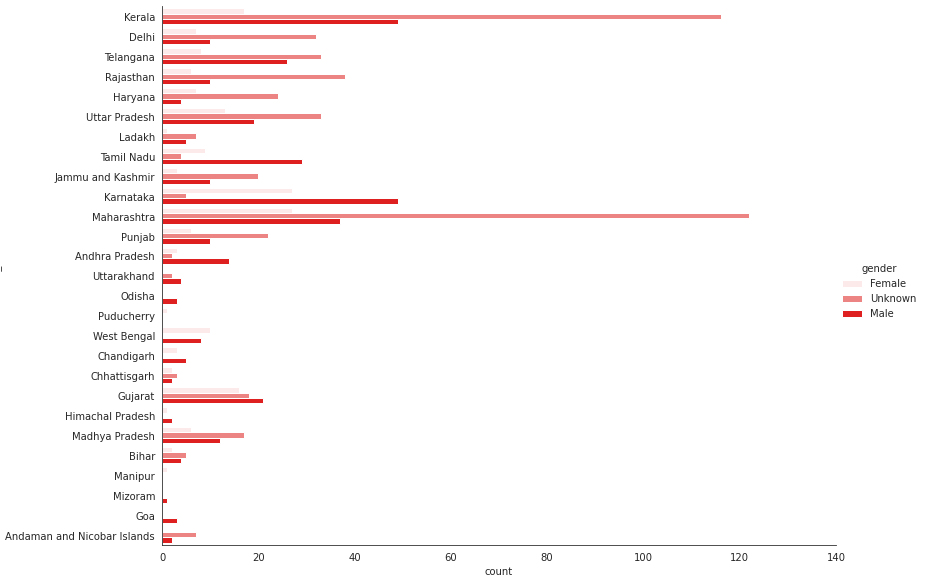

<Figure size 1152x432 with 0 Axes>

In [18]:
with sns.axes_style('white'):
    g = sns.factorplot(y ="detected_state", data=data, aspect=1.5,
                       kind="count", color='red', height=8, hue='gender')
    g.set_xticklabels(step=1)
plt.figure(figsize=(16,6))

In [19]:
from datetime import date
data['diagnosed_date'] = pd.to_datetime(data['diagnosed_date']).dt.strftime("%Y%m%d")
data['status_change_date'] = pd.to_datetime(data['status_change_date']).dt.strftime("%Y%m%d")
x = (data['diagnosed_date'])
x
y = (data['status_change_date'])

In [20]:

age = data.loc[(data.age >= 91.0) & (data.age<=100.0), ['id']]
age.count()
age_grp = pd.DataFrame([14,23,129,94,66,74,58,9,4,1],
                       index = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100'],
                      columns = ['cases'])
age_grp

,cases
0-10,14
10-20,23
20-30,129
30-40,94
40-50,66
50-60,74
60-70,58
70-80,9
80-90,4
90-100,1


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D314FF1130>],
      dtype=object)

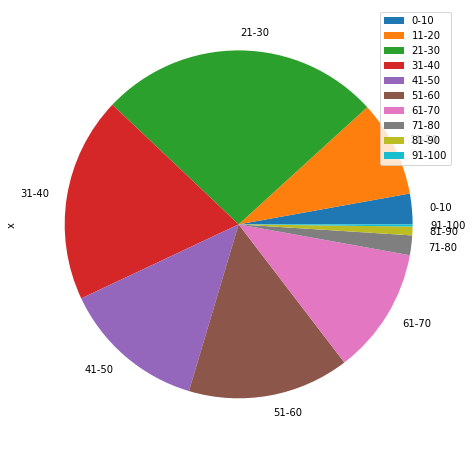

In [21]:
df = pd.DataFrame([14,44,129,94,66,74,58,9,4,1], index=['0-10', '11-20', '21-30', '31-40', '41-50'
, '51-60', '61-70', '71-80', '81-90', '91-100'], columns=['x'])
df.plot(kind="pie", subplots=True, figsize=(8,8))

In [22]:
x = data.groupby('current_status').count()
first =data.loc[data.current_status=='Deceased',['id']]
y = first.count()
y

id    18
dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D315084730>],
      dtype=object)

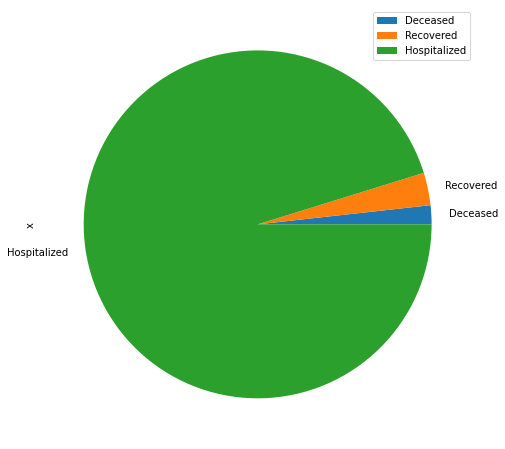

In [23]:
Male = (data['current_status'] == 'Deceased') & (data['gender'] == 'Female')
Male = len(data.loc[Male])
Male


df = pd.DataFrame([18,31,975], index=['Deceased', 'Recovered', 'Hospitalized'], columns=['x'])
 
# make the plot
df.plot(kind='pie', subplots=True, figsize=(8, 8))


Deceased - 18 Male - 14 Female - 4

Recovered - 31. Male - 17 Female - 7

Hospitalized - 975 Male - 308 Female - 165

In [24]:
School = (data['diagnosed_date'] > '2020-01-30') & (data['diagnosed_date'] <= '2020-03-08') 
School = len(data.loc[School])
Public = (data['diagnosed_date'] > '2020-01-30') & (data['diagnosed_date'] <= '2020-03-12')
Public = len(data.loc[Public])
WFH = (data['diagnosed_date'] > '2020-01-30') & (data['diagnosed_date'] <= '2020-03-15')
WFH = len(data.loc[WFH])
Lockdown = (data['diagnosed_date'] > '2020-01-30') & (data['diagnosed_date'] <= '2020-03-28') 
Lockdown = len(data.loc[Lockdown])

In [25]:
CaseCount = [School,Public,WFH,Lockdown]
labels = ['schools shutdown','public places shutdown',
            'work from home started','country under lockdown']
dates = ['2020-03-09','2020-03-13','2020-03-15','2020-03-28']

In [26]:
plot = pd.DataFrame({'dates':dates,'Labels': labels, 'CaseCount': CaseCount})
plot

,dates,Labels,CaseCount
0,2020-03-09,schools shutdown,0
1,2020-03-13,public places shutdown,0
2,2020-03-15,work from home started,0
3,2020-03-28,country under lockdown,0


C:\Users\MY DESKTOP\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


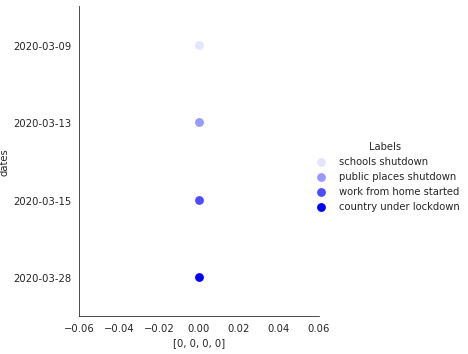

In [27]:
with sns.axes_style('white'):
    g = sns.factorplot(y ="dates", x = CaseCount, data=plot, aspect=1, color='blue', height=5, hue='Labels')
    g.set_xticklabels(step=1)

In [28]:
data['diagnosed_date'] = pd.to_datetime(data['diagnosed_date'])
data['status_change_date'] = pd.to_datetime(data['status_change_date'])
data['days'] = data['diagnosed_date'] - data['status_change_date']
Male = (data['current_status'] == 'Recovered')
first = (data.loc[Male])

In [30]:
first.head()

,id,unique_id,government_id,diagnosed_date,age,gender,detected_city,detected_city_pt,detected_district,detected_state,nationality,current_status,status_change_date,notes,current_location,current_location_pt,contacts,days
0,1,1,KL-TS-P1,2020-01-30,20.0,Female,Thrissur,SRID=4326;POINT (76.21325419999999 10.5256264),Thrissur,Kerala,India,Recovered,2020-02-14,Travelled from Wuhan.\nStudent from Wuhan,NaN,SRID=4326;POINT (76.21325419999999 10.5256264),[],-15 days
1,2,2,KL-AL-P1,2020-02-02,NaN,Unknown,Alappuzha,SRID=4326;POINT (76.333482 9.498000100000001),Alappuzha,Kerala,India,Recovered,2020-02-14,Travelled from Wuhan.\nStudent from Wuhan,NaN,SRID=4326;POINT (76.333482 9.498000100000001),[],-12 days
2,3,3,KL-KS-P1,2020-02-03,NaN,Unknown,Kasaragod,SRID=4326;POINT (80 20),Kasaragod,Kerala,India,Recovered,2020-02-14,Travelled from Wuhan.\nStudent from Wuhan,NaN,SRID=4326;POINT (80 20),[],-11 days
3,4,4,DL-P1,2020-03-02,45.0,Male,East Delhi (Mayur Vihar),SRID=4326;POINT (80 20),East Delhi,Delhi,India,Recovered,2020-03-15,"Travelled from Austria, Italy.\nTravel history...",NaN,SRID=4326;POINT (80 20),"[22,23,24,25,26,27,47]",-13 days
4,5,5,TS-P1,2020-03-02,24.0,Male,Hyderabad,SRID=4326;POINT (78.4349398685041 17.4263524),Hyderabad,Telangana,India,Recovered,2020-03-02,".\nTravel history to Dubai, Singapore contact",NaN,SRID=4326;POINT (78.4349398685041 17.4263524),[],0 days


Average number of dats to recover is 13 days

# Affected Sectors

In [31]:
entities = ['schools & other educational organization shutdown','public places shutdown',
            'work from home started for employees','country under lockdown','current situation']
dates = ['2020-03-10','2020-03-13','2020-03-16','2020-03-21','2020-03-26']

In [32]:
data = data.sort_values(by="diagnosed_date")

In [33]:
mask1 = (data['diagnosed_date'] > '2020-01-30') & (data['diagnosed_date'] <= '2020-03-09') # before school lockdown
mask1 = len(data.loc[mask1])
mask2 = (data['diagnosed_date'] > '2020-01-30') & (data['diagnosed_date'] <= '2020-03-12') #before public place shutdown
mask2 = len(data.loc[mask2])
mask3 = (data['diagnosed_date'] > '2020-01-30') & (data['diagnosed_date'] <= '2020-03-15') # beforw wfh
mask3 = len(data.loc[mask3])
mask4 = (data['diagnosed_date'] > '2020-01-30') & (data['diagnosed_date'] <= '2020-03-21') # beforw lookdown
mask4 = len(data.loc[mask4])
mask5 = (data['diagnosed_date'] > '2020-01-30') & (data['diagnosed_date'] <= '2020-03-26') # beforw lookdown
mask5 = len(data.loc[mask5])

In [34]:
case_counts = [mask1, mask2,mask3,mask4,mask5]

In [35]:
plot_data = pd.DataFrame({'dates':dates,'counts':case_counts,'entities': entities})

In [36]:
plot_data

,dates,counts,entities
0,2020-03-10,47,schools & other educational organization shutdown
1,2020-03-13,81,public places shutdown
2,2020-03-16,112,work from home started for employees
3,2020-03-21,333,country under lockdown
4,2020-03-26,734,current situation


In [37]:
plot_data['dates'] = pd.to_datetime(plot_data['dates'])

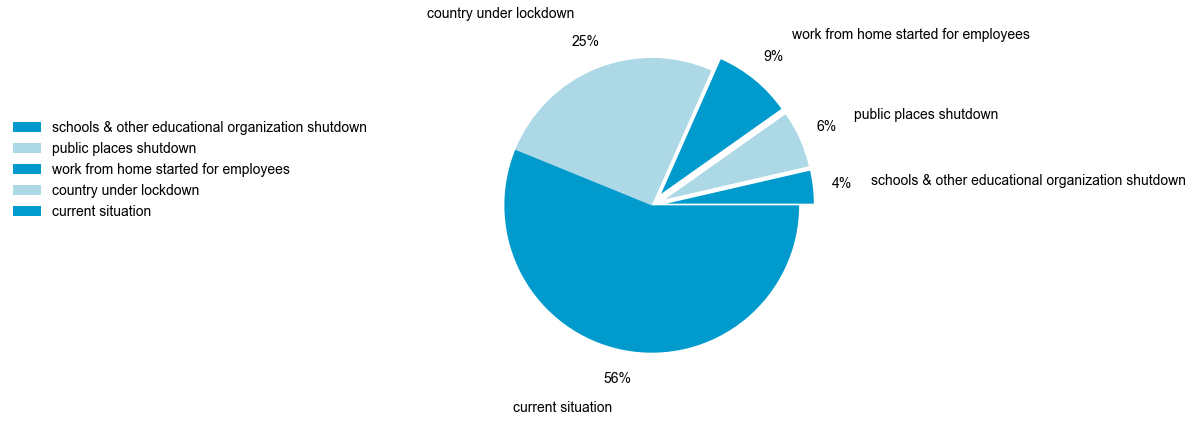

In [38]:
fig, ax = plt.subplots(figsize = (10,6))
labels = entities
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['font.size']=14
color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9',   
                      '#C1F0F6', '#0099CC']
percentages = case_counts
explode=(0.1,0.1,0.1,0,0)
ax.pie(percentages, explode=explode, labels=labels,  
       colors=color_palette_list[0:2], autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
ax.legend(frameon=False, bbox_to_anchor=(0.0,0.8))

# Current Situation Analysis

Text(0.5, 0, 'Covid19 Case Count')

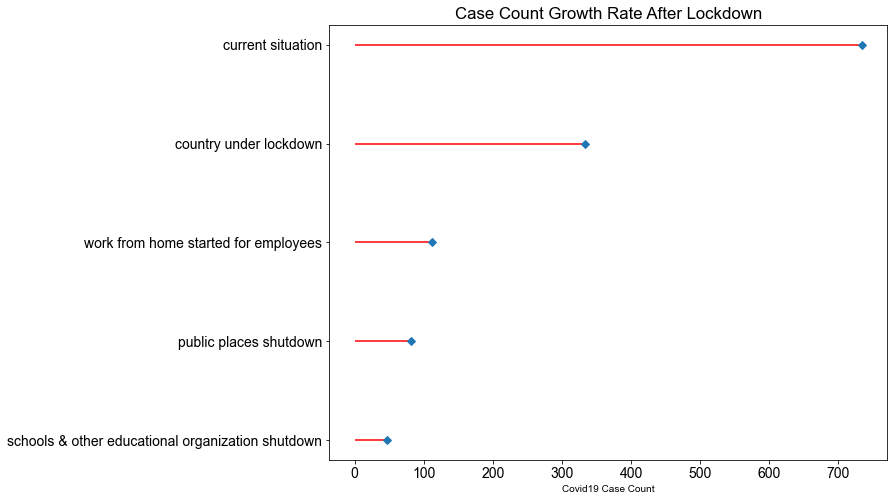

In [39]:
fig, ax = plt.subplots(figsize=(10,8))
plt.hlines(y=plot_data.entities, xmin=0, xmax=plot_data.counts, color='red')
plt.plot(plot_data.counts, plot_data.entities, "D")
# Add titles and axis names
ax.xaxis.label.set_color('black')
plt.yticks(plot_data.entities)
plt.title("Case Count Growth Rate After Lockdown")
plt.xlabel('Covid19 Case Count', fontsize=10)

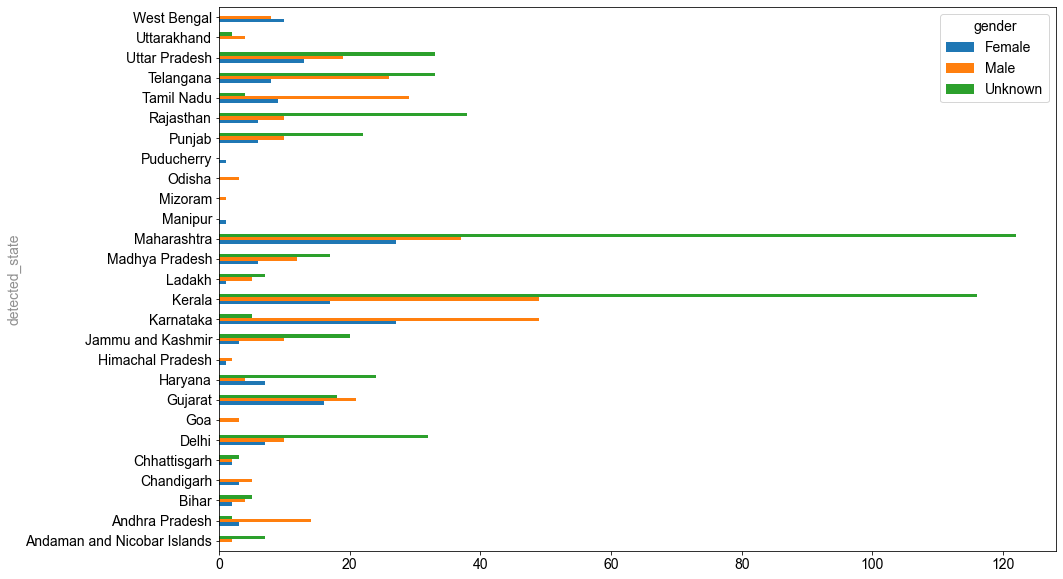

In [40]:
data.groupby(['detected_state','gender'])[['gender']].size().unstack().plot(kind='barh',figsize=(15,10))

In [41]:
cor = df.corr()

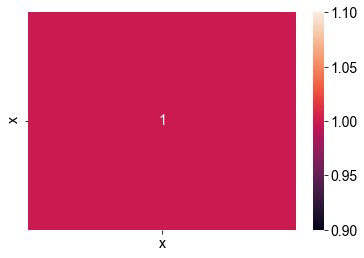

In [42]:
sns.heatmap(cor,annot = True)